# BCB 546X: Python Assignment Details

## Your Mission: Complete Python code in a Jupyter Notebook

In these commented lines, you will find a list of tasks. Below, within the code, you will find suggestions on how to complete this. Conveniently, you can load this script into a Jupyter cell using the `%load` magic command. You might find that useful. 

### Functions
1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
3. Write an alternative translation function.
4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
5. Write a function that computes the GC-content of each DNA sequence.

### In the MAIN part of the script
6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
    a. What is the smallest penguin species? 
    b. What is the geographical range of this species?
9. Plot a graph that shows the molecular weight as a function of GC content. 
10. Write the entire DataFrame to a new CSV file that includes your new columns.
11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

### Additional Instructions (points will be deducted if these instructions are not heeded) 
* Do all of this in a Jupyter notebook and push it to a GitHub repository.
* Your repository should not contain any files other than those associated with this assignment. 
* Read all comments carefully and answer the questions by including information in your Jupyter notebook.
* Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
* Include in-code comments to document functions and markdown comments to document rationale.
* Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
* Commit and push your completed work in the Jupyter notebook to your repository.
* Submit the URL to your git repository via Canvas by the end of the day on May 7, 2025.

#### __Disclaimer__ #

Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.

***

# Python Translate Script 

Here's the start of our Python script. Thanks for completing it for me! - Dr. X

IMPORTANT: install BioPython so that this will work

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import numpy as np

#### FUNCTIONS

Function 1 Document

####### GET SEQUENCES FUNCTION ########

__Purpose:__ This function reads in a FASTA file containing DNA sequences and extracts each sequence along with the species name (from the sequence description line). It returns a dictionary mapping each species' name to its DNA sequence. 

__Arguements:__ 

* `fasta_fn` (str): the file path to the fasta file

__Returns:__ 

* `sequence_data_dict` (dict): a dictionary where the keys are species names and the values are the corresponding DNA sequences ('seq' object from Biopython)

In [2]:
## 1 ##
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

 Function 2 Document

####### STRING-TRANSLATE FUNCTION ########

__Purpose:__ This function translates a nucleotide sequence (DNA) into its corresponding amino acid sequence using the Vertebrate Mitochondrial Codon Table. It reads the sequence in triplets (codons) and skips any incomplete codons or stop codons at the end.

__Arguements:__ 

* `string_nucleotides` (str): a DNA sequence composed of A, T, C, and G

__Returns:__ 

* `aa_seq_string` (str): The translated amino acid sequence as a string, without any terminal stop codon.

In [5]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    aa_seq_string = ""

    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[i:i+3]  # get 3-base codon

        if codon in mito_table.stop_codons:
            break # stop translation at the stop codon

        aa = mito_table.forward_table.get(codon, 'X')  # 'X' for unknown/invalid codons
        aa_seq_string += aa  # append translated amino acid

    return aa_seq_string

 Function 3 Document

####### ALTERNATE STRING-TRANSLATE FUNCTION ########

__Purpose:__ This function uses Biopython's built-in `.translate()` method to convert a DNA sequence into an amino acid sequence using the **Vertebrate Mitochondrial codon table**. This method is more concise and robust than manual translation.

__Arguements:__ 

* `seq_obj` (`Bio.Seq.Seq`): A Biopython `Seq` object containing a DNA sequence.

__Returns:__ 

* `str`: A translated amino acid sequence string (stop codon, if present, is removed automatically with `to_stop=True`).

In [6]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.
def translate_with_biopython(seq_obj):
    return str(seq_obj.translate(table = "Vertebrate Mitochondrial", to_stop = True))

 Function 4 Document

####### COUNT AA ANALYSIS FUNCTION ########

__Purpose:__ Calculates the molecular weight of an amino acid sequence using Biopython's `ProteinAnalysis` from the `ProtParam` module.

__Arguements:__ 

* `aa_seq` (str): An amino acid sequence as a string (without stop codons).

__Returns:__ 

* `float`: The estimated molecular weight of the amino acid sequence in Daltons (Da).

In [7]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(aa_seq)

    return analyzed_seq.molecular_weight()

 Function 5 Document

####### GC CONTENT ANALYSIS FUNCTION ########

__Purpose:__ Calculates the GC-content of a DNA sequence, which is the proportion of guanine (G) and cytosine (C) bases in the sequence.

__Arguements:__ 

* `dna_seq` (str): A DNA sequence composed of A, T, G, and C characters

__Returns:__ 

* `float`: The GC-content as a proportion (0 to 1)

In [8]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.
def compute_gc_content(dna_seq):
    dna_seq = dna_seq.upper()  # ensure all letters are uppercase for consistency
    g_count = dna_seq.count("G")
    c_count = dna_seq.count("C")
    total_bases = len(dna_seq)

    if total_bases == 0:
        return 0.0

    gc_content = (g_count + c_count) / total_bases
    return gc_content

####   MAIN  

In [31]:
!pwd
! mkdir generated_figs_files

/Users/lilliang/Documents/Spring_2025/EEOB5460/BCB546-PythonHW_Spring2025


In [12]:
cytb_seqs = get_sequences_from_file("original_files/penguins_cytb.fasta")

penguins_df = pd.read_csv("original_files/penguins_mass.csv")  
species_list = list(penguins_df.species)

## Suggestions for steps 6 and 7
## Note there are other ways to do this that will be acceptable, as long as they are documented and work

In [13]:
print(cytb_seqs)
print(penguins_df)
print(species_list)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

In [15]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan

In [17]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

for species, nucleotide_seq in cytb_seqs.items():
    aa_seq = translate_with_biopython(nucleotide_seq)

    mol_weight = compute_molecular_weight(str(aa_seq))  # ensure input is string

    gc = compute_gc_content(str(nucleotide_seq))

    penguins_df.loc[penguins_df["species"] == species, "molecular_weight"] = mol_weight
    penguins_df.loc[penguins_df["species"] == species, "gc_content"] = gc

In [18]:
print(penguins_df)

                    species   mass  molecular_weight  gc_content
0      Aptenodytes forsteri  28.00        42459.6021    0.483815
1   Aptenodytes patagonicus  13.40        42563.7067    0.496938
2       Eudyptes chrysocome   2.80        42475.5753    0.511811
3     Eudyptes chrysolophus   4.50        42445.5493    0.509186
4         Eudyptes sclateri   4.25        42475.5753    0.508311
5           Eudyptula minor   1.60        42491.6408    0.492563
6        Pygoscelis adeliae   4.60        42458.6140    0.490814
7     Pygoscelis antarctica   4.10        42404.5423    0.477690
8          Pygoscelis papua   6.10        42595.8759    0.471566
9       Spheniscus demersus   3.20        42431.5490    0.482940
10     Spheniscus humboldti   4.75        42399.5520    0.492563
11  Spheniscus magellanicus   3.40        42459.6021    0.482065


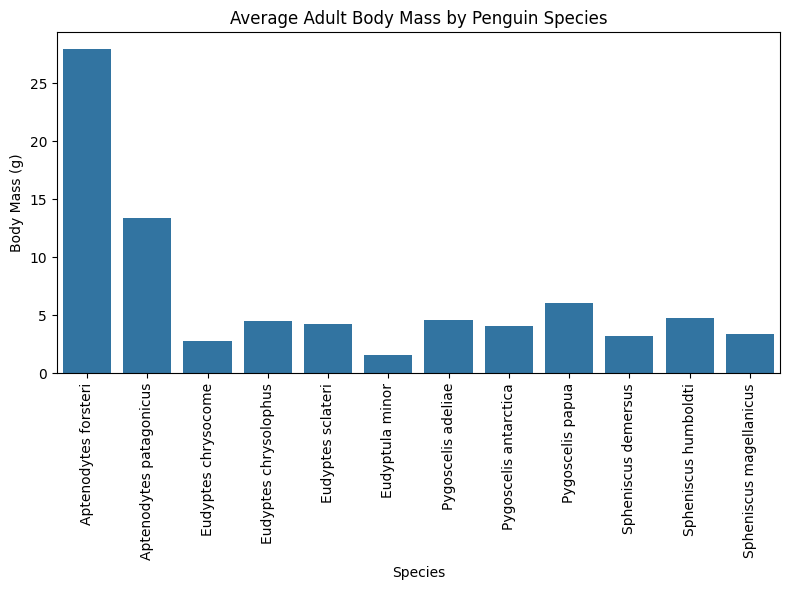

In [33]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

import matplotlib.pyplot as plt
import seaborn as sns

mass_of_pengs = plt.figure(figsize=(8, 6))
sns.barplot(data = penguins_df, x = "species", y = "mass", estimator = 'mean', errorbar = None)
plt.title("Average Adult Body Mass by Penguin Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
mass_of_pengs.savefig("generated_figs_files/mass_of_pengs.png")

# Discussion
## Q1: the smallest penguin species is Eudyptula minor, commonly known as "the little penguin".
## Q2: the little penguins are commonly found  along the coasts of New Zealand and Australia. 

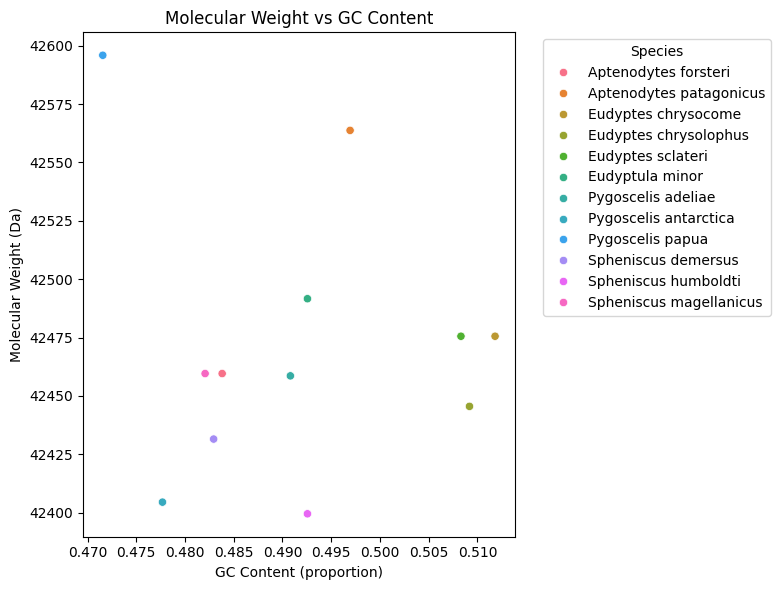

In [35]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

mw_gc_plt = plt.figure(figsize=(8, 6))
sns.scatterplot(data = penguins_df, x = "gc_content", y = "molecular_weight", hue = "species")
plt.title("Molecular Weight vs GC Content")
plt.xlabel("GC Content (proportion)")
plt.ylabel("Molecular Weight (Da)")
plt.legend(title = "Species", bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

mw_gc_plt.savefig("generated_figs_files/mw_gc_plt.png")

In [44]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv("generated_figs_files/penguins_mass_cytb.csv", index=False)

In [27]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

In [27]:
# bonus plot 1 prep
from collections import Counter

# combine all sequences and count amino acids
all_aa = ''.join(penguins_df["aa_sequence"].dropna())
aa_counts = Counter(all_aa)

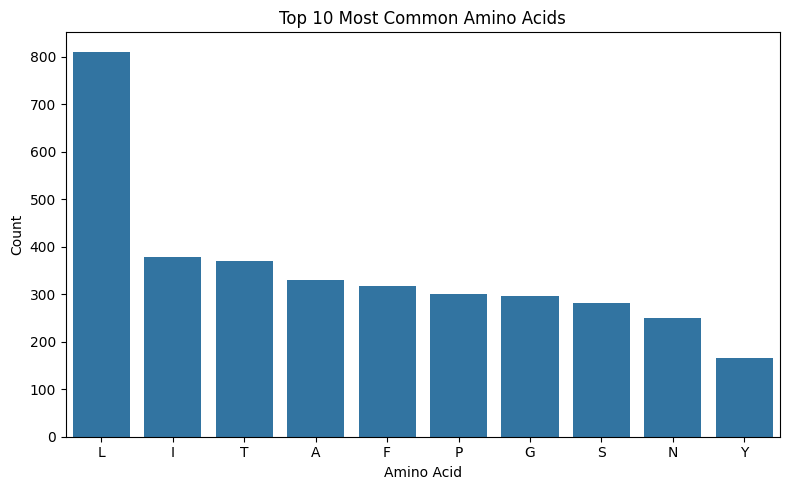

In [36]:
# bonus plot 1 
top_10 = dict(sorted(aa_counts.items(), key = lambda x: x[1], reverse = True)[:10])

common_aa = plt.figure(figsize=(8, 5))
sns.barplot(x = list(top_10.keys()), y = list(top_10.values()))
plt.title("Top 10 Most Common Amino Acids")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

common_aa.savefig("generated_figs_files/common_aa.png")

In [29]:
aa_counts_list = []

for i in range(len(penguins_df)):
    species = penguins_df.loc[i, "species"]
    aa_seq = penguins_df.loc[i, "aa_sequence"]
    
    if pd.notna(aa_seq):
        counts = Counter(aa_seq)         # count amino acids
        counts["species"] = species      # add species name
        aa_counts_list.append(counts)    # add to list

# create a new DataFrame from the list of counts
aa_counts_df = pd.DataFrame(aa_counts_list)

# group by species and sum across rows
aa_counts_df = aa_counts_df.groupby("species").sum()

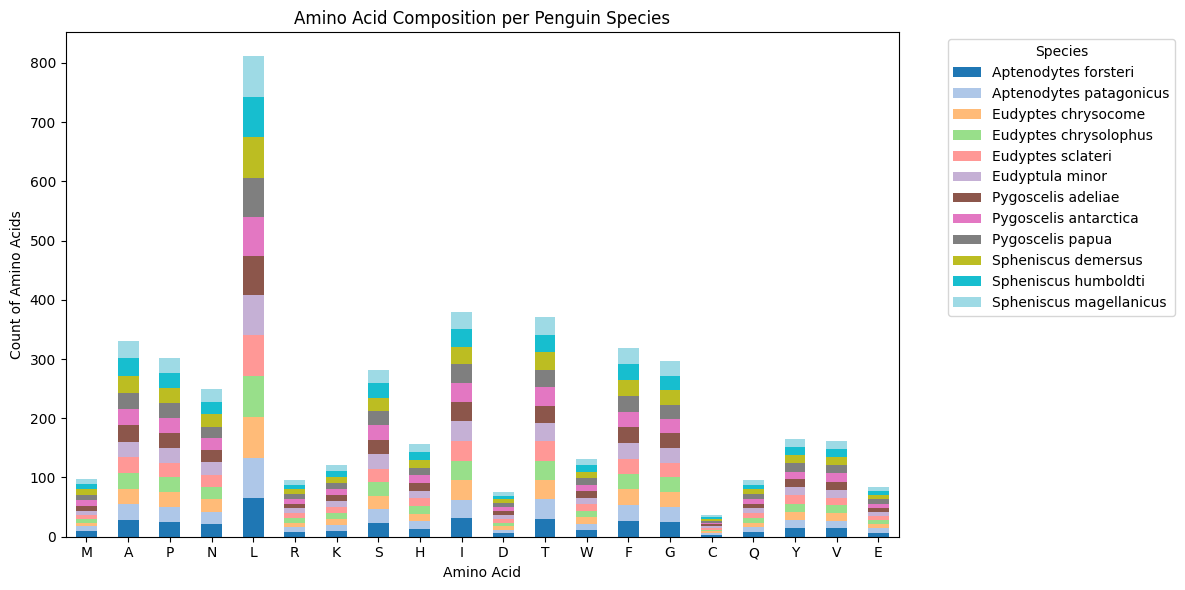

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

aa_counts_df.T.plot(
    kind = "bar",
    stacked = True,
    ax = ax, 
    colormap = "tab20"
)

ax.set_title("Amino Acid Composition per Penguin Species")
ax.set_ylabel("Count of Amino Acids")
ax.set_xlabel("Amino Acid")
ax.set_xticks(range(len(aa_counts_df.T.index)))
ax.set_xticklabels(aa_counts_df.T.index, rotation = 0)
ax.legend(title = "Species", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.tight_layout()
plt.show()

fig.savefig("generated_figs_files/aa_per_pengs.png")